#### Patrick Mugisha, "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

# Advanced Regression Techniques (Feature Selection)

While multiple regression is better than univariate regression because the former finds a model solution with **lower SSE** (higher r-squared). But, if there are **too many X variables (e.g., > 10) in a regression model**, the model becomes **too complex (or overfitting) to be useful** in practice due to **multicollinearity and difficulity of interpretation**. This problem is also known as **"curse of high dimensionality"**

Thus, **more advanced regression would be needed to deal with this issue**

> ## 1. Regularization 
> - refers to **the process of penalizing the model with too many redundant variables (or highly correlated variables)**
> - the goal is developing the regression model with **low SSE** and **simplicity (fewer X variables or predictors)** 
> - **two types of regression include regulariation in their objective function: Lasso and Ridge**
> - http://scikit-learn.org/stable/modules/linear_model.html

> ## 2. Feature selection
> - refers to **the process of selecting the most useful predictors**, helping analysts understand what predictors matter in predicting y value
> - the goal is developing the **simple** regression model with the **user specificed number of predictors**.
> - f_regression 

# Lasso regression (Regularization)

- (Least Absolute Shrinkage and Selection Operator) is one of the **regression models with regularization**
- Finds the model solution with **fewer X variables**

> #### How does Lasso work?#### 

> - Remember that the goal of regression is **Minimize SSE** and more predictors is likely to reduce **SSE**
> - Thus, Lasso includes **regularization** or **a mechanism of penalizing adding too many variables**. 

                  minimize (SSE  + alpha|coefficient|)

                  where alpha = parameter for penalizing adding more coefficients

> - This approach reinforces the Lasso regression to consider fewer predictors (simpler regression model)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm

#model validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

#ignore warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
teams = pd.read_csv("data/baseball.csv")
teams.head()

,yearID,teamID,Rank,R,RA,G,W,H,BB,HBP,AB,SF,HR,2B,3B,salary,BA,OBP,SLG
0,2000,CHA,1,978,839,162,95,1615,591,53,5646,61,216,325,33,31133500,0.286043,0.355692,0.470067
1,2000,CLE,2,950,816,162,90,1639,685,51,5683,52,221,310,30,75880771,0.288404,0.367022,0.470174
2,2000,DET,3,823,827,162,79,1553,562,43,5644,49,177,307,41,58265167,0.275159,0.342648,0.438164
3,2000,KCA,4,879,930,162,77,1644,511,48,5709,70,150,281,27,23433000,0.287966,0.347586,0.425469
4,2000,MIN,5,748,880,162,69,1516,556,35,5615,51,116,325,49,16519500,0.269991,0.336743,0.407302


On Base Percentage (OBP, On Base Average, OBA) is a measure of how often a batter reaches base. 

The full formula is OBP = (Hits + Walks + Hit by Pitch) / (At Bats + Walks + Hit by Pitch + Sacrifice Flies). Batters are not credited with reaching base on an error or fielder's choice, and they are not charged with an opportunity if they make a sacrifice bunt.

All Time Leaders
Ted Williams	.482	(career)
Barry Bonds	    .609	(2004 season)

http://www.baseball-reference.com/bullpen/On_base_percentage

In [3]:
teams = teams.drop(['yearID', 'teamID', 'Rank'], axis=1)
teams.head(2)

,R,RA,G,W,H,BB,HBP,AB,SF,HR,2B,3B,salary,BA,OBP,SLG
0,978,839,162,95,1615,591,53,5646,61,216,325,33,31133500,0.286043,0.355692,0.470067
1,950,816,162,90,1639,685,51,5683,52,221,310,30,75880771,0.288404,0.367022,0.470174


In [5]:
#assigning columns to X and Y variables
y = teams['R'] 
X = teams[['RA','G','W','H','BB','HBP','AB','SF','HR','2B','3B','salary','BA','OBP','SLG']]

#X = teams.drop(['R'], axis =1)

In [6]:
# split validation (70% training & 30% testing data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(294, 15) (294,) (126, 15) (126,)


Lasso model:

Go http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html and adapt the codes.

In [8]:
#Fit the model

model1 = lm.Lasso(alpha=1)          #higher alpha (penality parameter), fewer predictors 
model1.fit(X_train, y_train)        
model1_y = model1.predict(X_test)

In [10]:
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [ 2.20947439e-01  0.00000000e+00  2.22447484e+00  4.50669730e-01
  2.25236892e-01  2.71656276e-01 -4.35155264e-02  6.23641791e-01
  7.31861894e-01  1.70639869e-01  7.47129737e-01 -3.14760077e-08
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00]
y-intercept  -366.00549589544346


In [11]:
pd.DataFrame(list(zip(X.columns, np.transpose(model1.coef_)))).round(2)

,0,1
0,RA,0.22
1,G,0.00
2,W,2.22
3,H,0.45
4,BB,0.23
5,HBP,0.27
6,AB,-0.04
7,SF,0.62
8,HR,0.73
9,2B,0.17


The regression model has become a lot simpler than the full model with all X variables. Several X variables were removed from the model, including **G, AB, salary, BA, OBP, and SLG**. These removed variables have their **coefficients close to 0**.

R = 0.22RA + 2.22W + 0.45H + 0.23BB + ...

In [12]:
print("mean square error: ", mean_squared_error(y_test, model1_y))
print("variance or r-squared: ", explained_variance_score(y_test, model1_y))

mean square error:  340.472121457594
variance or r-squared:  0.9554690088527877


# Feature Selection

## f_Regression

- Quick linear model for testing the effect of a single predictor, sequentially for many predictors.
- http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression

### Model #2

In [13]:
#selec only 2 X variables
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
X_new

array([[0.35569202, 0.4700673 ],
       [0.3670221 , 0.4701742 ],
       [0.34264846, 0.43816442],
       [0.34758599, 0.42546856],
       [0.33674285, 0.40730187],
       [0.35414681, 0.449964  ],
       [0.34054652, 0.42344583],
       [0.34111482, 0.46926193],
       [0.34057971, 0.43503334],
       [0.32851105, 0.39909174],
       [0.35950671, 0.45773381],
       [0.36107193, 0.44151355],
       [0.35235536, 0.47245913],
       [0.35154394, 0.44617564],
       [0.35612083, 0.4554582 ],
       [0.34325522, 0.44702751],
       [0.32528206, 0.40337947],
       [0.36057617, 0.47666068],
       [0.3385103 , 0.423888  ],
       [0.33481294, 0.41115295],
       [0.34647705, 0.42867553],
       [0.34601247, 0.43036821],
       [0.33133117, 0.40896714],
       [0.32597959, 0.43161698],
       [0.32903434, 0.39956451],
       [0.36170213, 0.4720058 ],
       [0.34053794, 0.43094326],
       [0.33338728, 0.42934684],
       [0.36171213, 0.45459364],
       [0.32970725, 0.40233813],
       [0.

In [14]:
# what are those two columns?
selector = SelectKBest(f_regression, k=2).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[13 14]


In [15]:
X_train.head(2)

,RA,G,W,H,BB,HBP,AB,SF,HR,2B,3B,salary,BA,OBP,SLG
106,796,162,85,1580,580,73,5672,54,196,342,32,83786666,0.278561,0.350055,0.453808
378,759,162,61,1297,447,43,5411,24,137,265,36,88197033,0.239697,0.301603,0.377934


f_regression determines that **OBP** and **SLG** are two most important predictors

In [16]:
# split validation (using X_new)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(294, 2) (294,) (126, 2) (126,)


In [17]:
# Model Building

model2 = lm.LinearRegression()
model2.fit(X_train, y_train)
model2_y = model2.predict(X_test)

# Model Evaluation
print("mean square error: ", mean_squared_error(y_test, model2_y))
print("variance or r-squared: ", explained_variance_score(y_test, model2_y))

mean square error:  412.9097713776245
variance or r-squared:  0.9472019942597845


### Model #3

use f_regression with k = 3 and develop a new regression model

In [18]:
X_new = SelectKBest(f_regression, k=3).fit_transform(X, y)
X_new

array([[0.28604322, 0.35569202, 0.4700673 ],
       [0.28840401, 0.3670221 , 0.4701742 ],
       [0.27515946, 0.34264846, 0.43816442],
       ...,
       [0.24451695, 0.307743  , 0.37792278],
       [0.26044669, 0.32022288, 0.38130403],
       [0.26986962, 0.32265484, 0.41846758]])

In [19]:
# what are those three columns?

selector = SelectKBest(f_regression, k=3).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[12 13 14]


In [20]:
# split validation (using X_new)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(294, 3) (294,) (126, 3) (126,)


In [21]:
# Model Building
model3 = lm.LinearRegression()
model3.fit(X_train, y_train)
model3_y = model3.predict(X_test)

# Model Evaluation
print("mean square error: ", mean_squared_error(y_test, model3_y))
print("variance or r-squared: ", explained_variance_score(y_test, model3_y))

mean square error:  415.247601010804
variance or r-squared:  0.9469976286082739


> Model #3 is not better than Model #2

## Recursive Feature Selection (RFE): Another Feature Selection Method

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [22]:
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=2)
rfe_y = rfe.fit(X,y)

print("Features sorted by their rank:")
print(sorted(zip([x for x in rfe.ranking_], X.columns)))

Features sorted by their rank:
[(1, 'OBP'), (1, 'SLG'), (2, 'BA'), (3, 'HR'), (4, '3B'), (5, '2B'), (6, 'H'), (7, 'AB'), (8, 'SF'), (9, 'HBP'), (10, 'BB'), (11, 'W'), (12, 'RA'), (13, 'G'), (14, 'salary')]


# Appendix : RandormForestRegressor for Feature Selection
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [24]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.datasets import make_regression   #not needed for now

#assigning columns to X and Y variables
y = teams['R'] 
X = teams[['RA','G','W','H','BB','HBP','AB','SF','HR','2B','3B','salary','BA','OBP','SLG']]
#X = teams.drop(['R'], axis =1)

# split validation (70% training & 30% testing data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# model building
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)
regr_predicted = regr.predict(X_test)

print("mean square error: ", mean_squared_error(y_test, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y_test, regr_predicted))

mean square error:  476.65215317460314
variance or r-squared:  0.9361352930174401


> Randomforestregressor is known to be very accurate, but Lasso appears to outperform Randomforestregressor in this dataset.

In [25]:
feature_importances = pd.DataFrame(regr.feature_importances_, index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
SLG,0.764572
OBP,0.162897
H,0.008954
SF,0.007698
RA,0.007402
BB,0.007329
AB,0.006880
HBP,0.006475
W,0.006383
BA,0.005448


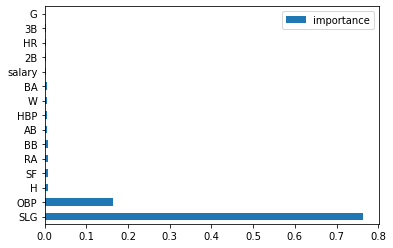

In [26]:
feature_importances.plot(kind='barh');

References

- http://adilmoujahid.com/posts/2014/07/baseball-analytics/ (reproduced from this page)
- https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/#four
- http://www.python-course.eu/lambda.php (excellent resource for lamda and map)